In [1]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar archivos CSV de México
mexico_shared_room = pd.read_csv("mexico_shared_room.csv")

In [3]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
mexico_shared_room['price'] = mexico_shared_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_19896\2897315053.py:3: SyntaxWarning: invalid escape sequence '\$'
  mexico_shared_room['price'] = mexico_shared_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [ ]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
   "name", "description", "neighborhood_overview", "host_name", "host_since",
  "host_location", "host_response_rate", "neighbourhood",
    "room_type", "bathrooms_text", "amenities", "host_neighbourhood",
   "neighbourhood_cleansed", "source", "host_response_time",
    "host_verifications", "host_has_profile_pic"
]

# Eliminar columnas del DataFrame
mexico_shared_room = mexico_shared_room.drop(columns=columnas_a_eliminar)

In [ ]:
mexico_shared_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           125 non-null    float64
 1   host_id                      125 non-null    int64  
 2   host_acceptance_rate         125 non-null    int64  
 3   property_type                125 non-null    object 
 4   price                        125 non-null    float64
 5   latitude                     125 non-null    float64
 6   longitude                    125 non-null    float64
 7   accommodates                 125 non-null    float64
 8   bathrooms                    125 non-null    float64
 9   bedrooms                     125 non-null    float64
 10  beds                         125 non-null    float64
 11  minimum_nights               125 non-null    int64  
 12  maximum_nights               125 non-null    int64  
 13  minimum_minimum_nigh

In [ ]:
#mexico_shared_room.to_csv("mexico_shared_room1.csv")

mexico_entire_home     
PRICE Vs host_acceptance_rate

In [6]:
mexico_shared_room['property_type'] = mexico_shared_room['property_type'].astype('category').cat.codes

In [7]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_shared_room[['host_acceptance_rate']]
Vars_Dep=mexico_shared_room['price']

In [8]:
#Se define model como funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [9]:
#verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [10]:
#Ajustamos

#matrices=letra mayuscula
#vector=letra minusculka
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [11]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.33205035]),
 'rank_': 1,
 'singular_': array([574.90869274]),
 'intercept_': 566.6338891118766}

Modelo matemático:y=2.33205035 * 566.6338891118766

In [12]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0008898383461181103

In [13]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_shared_room[['host_acceptance_rate']])
y_pred

array([799.83892365, 566.63388911, 764.85816847, 638.92744982,
       785.84662157, 795.17482295, 792.84277261, 799.83892365,
       638.92744982, 624.93514775, 799.83892365, 624.93514775,
       736.87356432, 736.87356432, 683.23640638, 799.83892365,
       799.83892365, 694.89665811, 790.51072226, 783.51457123,
       713.55306087, 797.5068733 , 722.88126225, 792.84277261,
       790.51072226, 799.83892365, 566.63388911, 722.88126225,
       799.83892365, 797.5068733 , 797.5068733 , 797.5068733 ,
       797.5068733 , 797.5068733 , 799.83892365, 771.8543195 ,
       797.5068733 , 799.83892365, 785.84662157, 797.5068733 ,
       797.5068733 , 797.5068733 , 797.5068733 , 797.5068733 ,
       799.83892365, 566.63388911, 799.83892365, 788.17867192,
       799.83892365, 799.83892365, 799.83892365, 799.83892365,
       799.83892365, 799.83892365, 781.18252088, 792.84277261,
       799.83892365, 799.83892365, 797.5068733 , 797.5068733 ,
       797.5068733 , 799.83892365, 797.5068733 , 764.85

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_shared_room.insert(0, 'Predicciones', y_pred)
mexico_shared_room

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

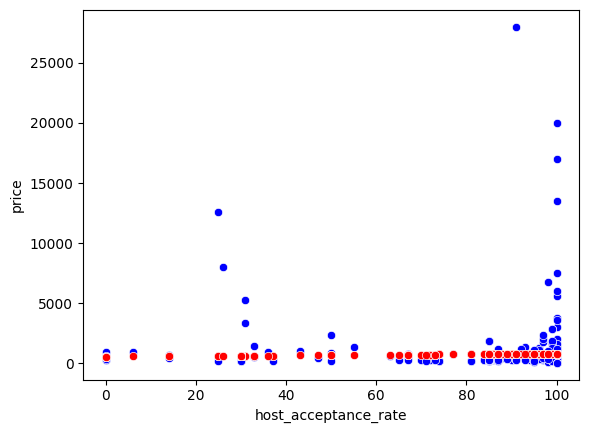

In [15]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=mexico_shared_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=mexico_shared_room)

In [16]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0008898383461181103

In [17]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.02983015833209925

In [81]:
#sns.pairplot(mexico_entire_home)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_shared_room.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

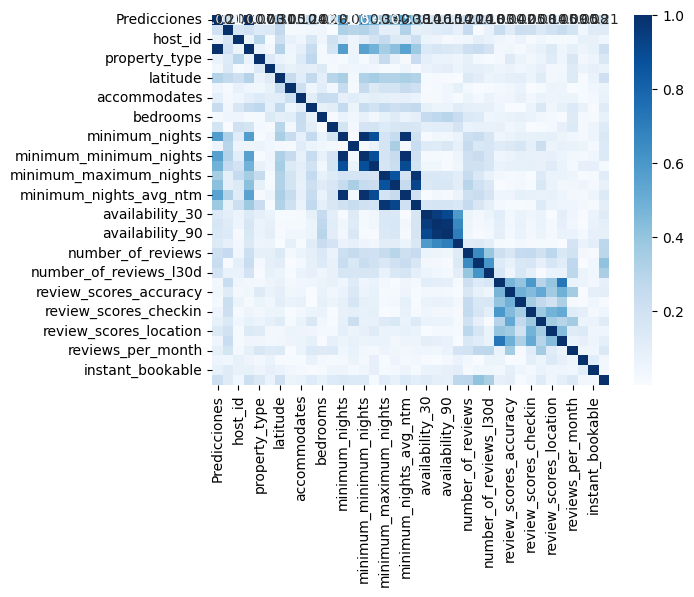

In [20]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_is_superhost”

In [24]:
mexico_shared_room1 = pd.read_csv("mexico_shared_room1.csv")

In [25]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]

Vars_Indep=mexico_shared_room1[['host_is_superhost']]
Vars_Dep=mexico_shared_room1['price']

In [26]:
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-486.06474268]),
 'rank_': 1,
 'singular_': array([6.50033569]),
 'intercept_': 814.5439093484418}

Modelo matemático:y=-486.06474268 * 814.5439093484418

In [27]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.004941938458912998

In [28]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_shared_room1[['host_is_superhost']])
y_pred

array([814.54390935, 814.54390935, 328.47916667, 814.54390935,
       328.47916667, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54390935,
       814.54390935, 814.54390935, 814.54390935, 814.54

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_shared_room1.insert(0, 'Predicciones', y_pred)
mexico_shared_room1

<Axes: xlabel='host_is_superhost', ylabel='price'>

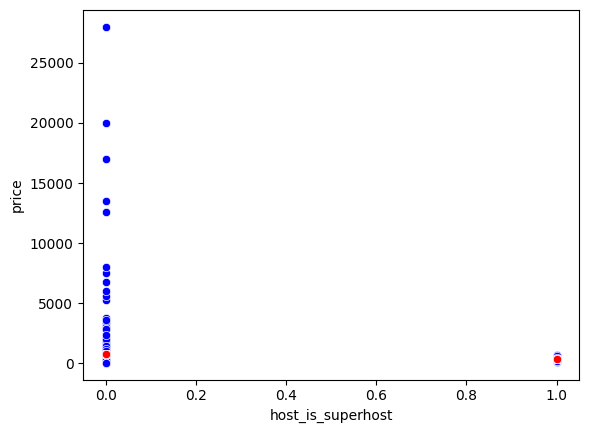

In [30]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=mexico_shared_room1)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=mexico_shared_room1)

In [31]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.004941938458912998

In [32]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.070298922174618

In [33]:
mexico_shared_room1['property_type'] = mexico_shared_room1['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_shared_room1.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

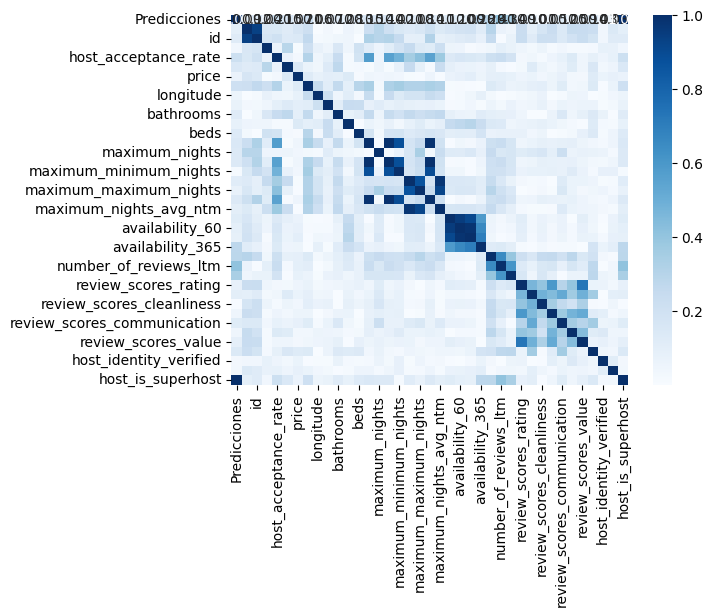

In [37]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“accommodates vs bathrooms” 


In [39]:
mexico_shared_room2 = pd.read_csv("mexico_shared_room1.csv")

In [40]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_shared_room2[['bathrooms']]
Vars_Dep=mexico_shared_room2['accommodates']

In [41]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.17779756]),
 'rank_': 1,
 'singular_': array([14.43114013]),
 'intercept_': 1.3483034048772753}

Modelo matemático:y=0.17779756 * 1.3483034048772753

In [42]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.011605748355282164

In [43]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_shared_room2[['bathrooms']])
y_pred

array([1.61499975, 1.61499975, 1.59722   , 1.59722   , 1.8816961 ,
       1.52610097, 1.59722   , 1.52610097, 1.52610097, 1.52610097,
       1.52610097, 1.61499975, 1.52610097, 1.52610097, 1.61499975,
       1.61499975, 1.52610097, 1.61499975, 1.61499975, 1.61499975,
       1.52610097, 1.61499975, 1.52610097, 1.61499975, 1.61499975,
       1.52610097, 1.61499975, 1.52610097, 1.52610097, 1.61499975,
       1.61499975, 1.52610097, 1.61499975, 1.61499975, 1.52610097,
       1.52610097, 1.61499975, 1.61499975, 1.61499975, 1.61499975,
       1.52610097, 1.61499975, 1.52610097, 1.61499975, 1.61499975,
       1.52610097, 1.61499975, 1.61499975, 1.61499975, 1.52610097,
       1.52610097, 1.52610097, 1.52610097, 1.52610097, 1.52610097,
       1.70389853, 1.61499975, 1.52610097, 1.52610097, 1.52610097,
       1.52610097, 1.61499975, 1.61499975, 1.3483034 , 1.79279732,
       1.52610097, 1.79279732, 1.8816961 , 1.52610097, 1.59722   ,
       1.59722   , 1.59722   , 1.59722   , 1.59722   , 1.59722

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_shared_room2.insert(0, 'Predicciones', y_pred)
mexico_shared_room2


<Axes: xlabel='bathrooms', ylabel='accommodates'>

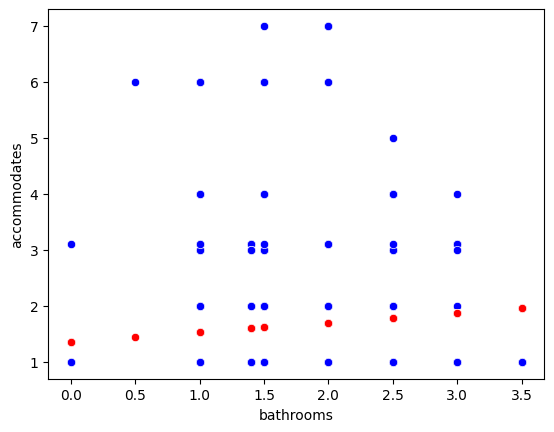

In [45]:

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=mexico_shared_room2)
sns.scatterplot(x='bathrooms', y='Predicciones', color="red", data=mexico_shared_room2)


In [46]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.011605748355282164

In [47]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.10772997890690485

In [48]:
mexico_shared_room2['property_type'] = mexico_shared_room2['property_type'].astype('category').cat.codes

In [ ]:

#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_shared_room2.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


<Axes: >

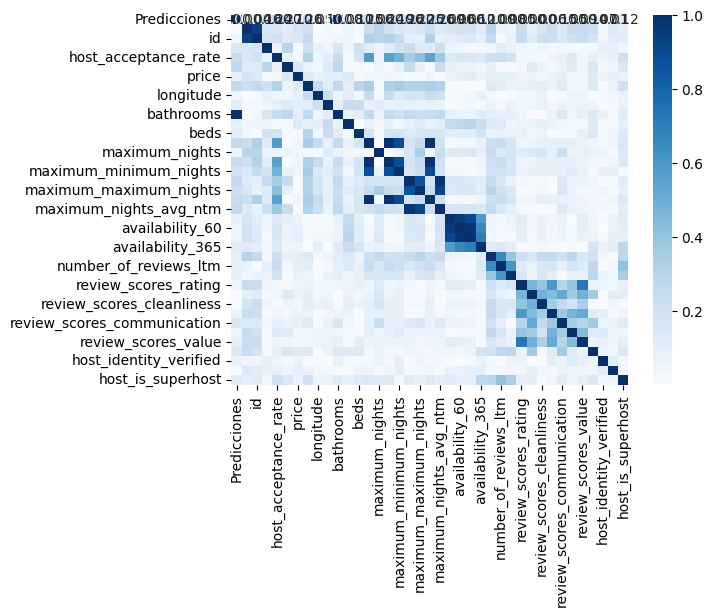

In [51]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

price vs review_scores_cleanliness

In [52]:
mexico_shared_room3 = pd.read_csv("mexico_shared_room1.csv")

In [53]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_shared_room3[['review_scores_cleanliness']]
Vars_Dep=mexico_shared_room3['price']


In [54]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([641.25267661]),
 'rank_': 1,
 'singular_': array([2.61600321]),
 'intercept_': -2346.4378265166238}

Modelo matemático:y=641.25267661 * -2346.4378265166238

In [55]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0013930684319952702

In [56]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_shared_room3[['review_scores_cleanliness']])
y_pred

array([770.05018182, 770.05018182, 519.96163795, 770.05018182,
       814.93786919, 770.05018182, 564.84932531, 770.05018182,
       770.05018182, 539.19921824, 808.52534242, 770.05018182,
       731.57502123, 731.57502123, 770.05018182, 770.05018182,
       859.82555655, 770.05018182, 859.82555655, 770.05018182,
       782.87523536, 770.05018182, 782.87523536, 770.05018182,
       770.05018182, 770.05018182, 770.05018182, 628.97459297,
       770.05018182, 731.57502123, 731.57502123, 532.78669148,
       731.57502123, 731.57502123, 731.57502123, 859.82555655,
       494.31153088, 744.40007476, 712.33744093, 731.57502123,
       648.21217327, 661.0372268 , 750.81260153, 731.57502123,
       770.05018182, 731.57502123, 770.05018182, 770.05018182,
       770.05018182, 770.05018182, 731.57502123, 596.91195914,
       731.57502123, 648.21217327, 770.05018182, 731.57502123,
       770.05018182, 519.96163795, 731.57502123, 770.05018182,
       731.57502123, 770.05018182, 770.05018182, 814.93

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_shared_room3.insert(0, 'Predicciones', y_pred)
mexico_shared_room3

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

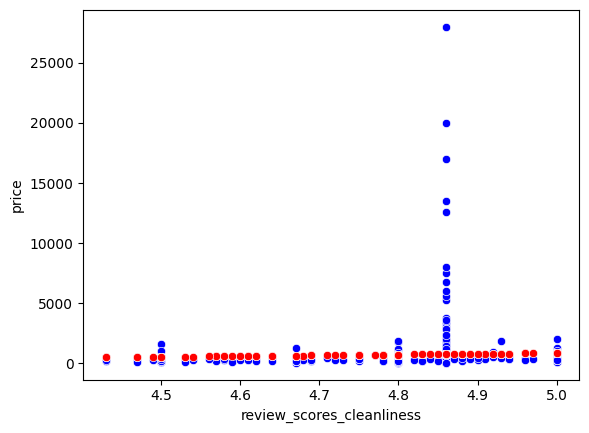

In [58]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=mexico_shared_room3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=mexico_shared_room3)

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0013930684319952702

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.03732383195754785

In [61]:
mexico_shared_room3['property_type'] = mexico_shared_room3['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_shared_room3.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

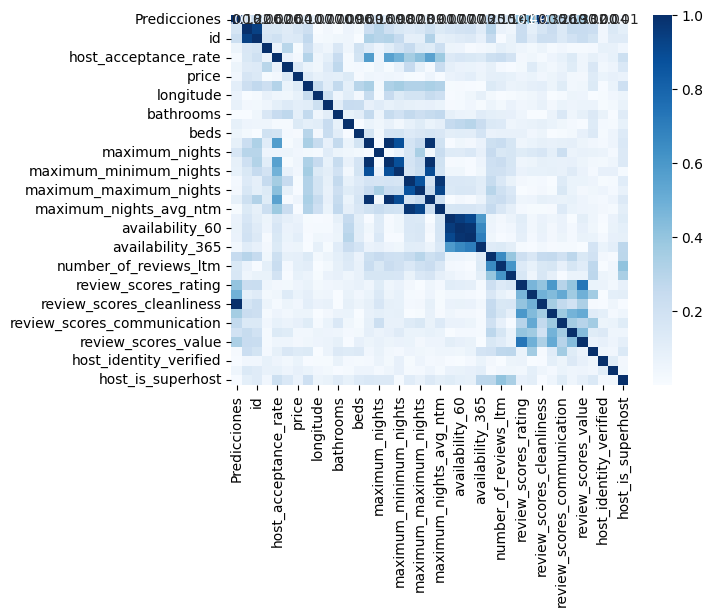

In [64]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_identity_verified”


In [65]:
mexico_shared_room4 = pd.read_csv("mexico_shared_room1.csv")

In [66]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_shared_room4[['host_identity_verified']]
Vars_Dep=mexico_shared_room4['price']


In [67]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-712.04496664]),
 'rank_': 1,
 'singular_': array([4.14632608]),
 'intercept_': 1436.444444444444}

Modelo matemático:y=-712.04496664 * 1436.444444444444


In [68]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)


0.004314984803851618

In [ ]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_shared_room4[['host_identity_verified']])
y_pred


In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_shared_room4.insert(0, 'Predicciones', y_pred)
mexico_shared_room4


<Axes: xlabel='host_identity_verified', ylabel='price'>

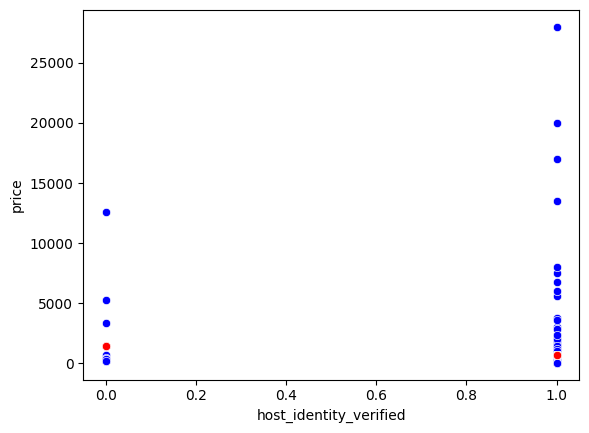

In [71]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=mexico_shared_room4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=mexico_shared_room4)


In [72]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.004314984803851618

In [73]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.06568854393158383

In [74]:
mexico_shared_room4['property_type'] = mexico_shared_room4['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_shared_room4.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


<Axes: >

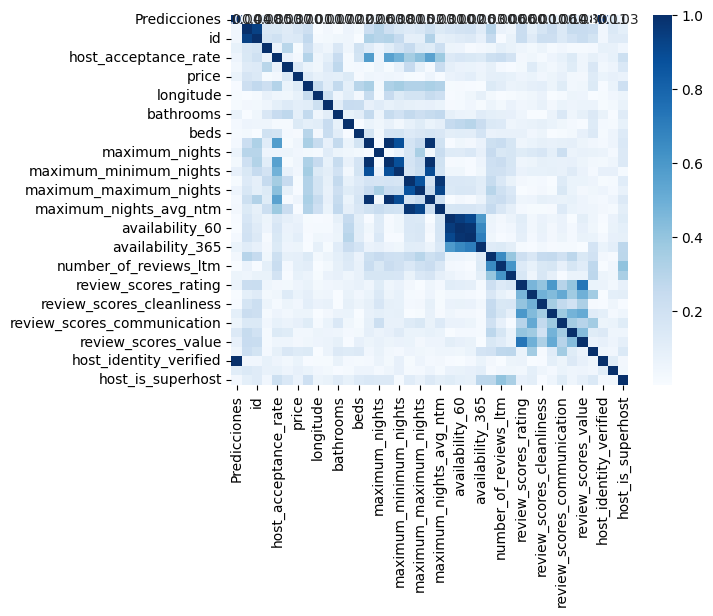

In [77]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs instant_bookable”


In [78]:
mexico_shared_room5 = pd.read_csv("mexico_shared_room1.csv")

In [79]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_shared_room5[['instant_bookable']]
Vars_Dep=mexico_shared_room5['price']


In [80]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-385.66181279]),
 'rank_': 1,
 'singular_': array([9.88007895]),
 'intercept_': 917.9356223175968}

Modelo matemático:y=-385.66181279 * 917.9356223175968

In [81]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0071873969214582

In [82]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_shared_room5[['instant_bookable']])
y_pred

array([917.93562232, 532.27380952, 532.27380952, 917.93562232,
       532.27380952, 917.93562232, 917.93562232, 917.93562232,
       917.93562232, 917.93562232, 917.93562232, 917.93562232,
       917.93562232, 917.93562232, 917.93562232, 917.93562232,
       917.93562232, 917.93562232, 917.93562232, 917.93562232,
       917.93562232, 917.93562232, 917.93562232, 917.93562232,
       917.93562232, 532.27380952, 917.93562232, 917.93562232,
       917.93562232, 532.27380952, 532.27380952, 917.93562232,
       532.27380952, 532.27380952, 532.27380952, 917.93562232,
       532.27380952, 532.27380952, 917.93562232, 532.27380952,
       532.27380952, 917.93562232, 532.27380952, 917.93562232,
       532.27380952, 917.93562232, 917.93562232, 917.93562232,
       917.93562232, 532.27380952, 917.93562232, 917.93562232,
       917.93562232, 917.93562232, 917.93562232, 917.93562232,
       917.93562232, 917.93562232, 917.93562232, 917.93562232,
       532.27380952, 917.93562232, 917.93562232, 917.93

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_shared_room5.insert(0, 'Predicciones', y_pred)
mexico_shared_room5


<Axes: xlabel='instant_bookable', ylabel='price'>

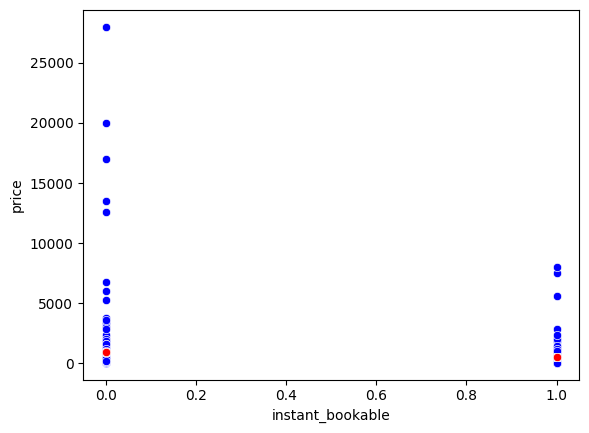

In [84]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=mexico_shared_room5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=mexico_shared_room5)


In [85]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0071873969214582

In [86]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0847785168628126

In [87]:
mexico_shared_room5['property_type'] = mexico_shared_room5['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_shared_room5.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

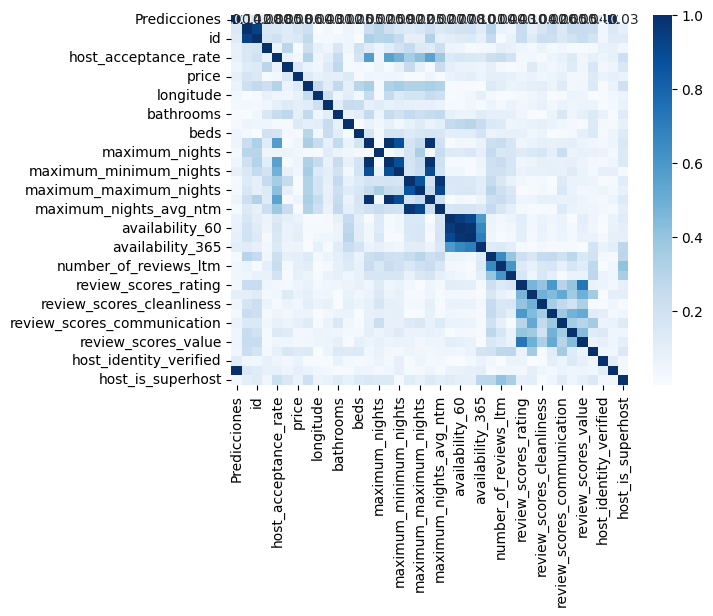

In [90]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“Price vs property_type”


In [91]:
mexico_shared_room6 = pd.read_csv("mexico_shared_room1.csv")

In [92]:
mexico_shared_room6['property_type'] = mexico_shared_room6['property_type'].astype('category').cat.codes


In [93]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_shared_room6[['property_type']]
Vars_Dep=mexico_shared_room6['price']


In [94]:
# Ver categorías únicas de room_type
mexico_shared_room6['property_type'].unique()

array([13, 12,  8, 10,  9,  7,  5,  4, 11, 16,  2, 14, 15,  0,  3, 17,  6,
        1], dtype=int8)

In [ ]:
mexico_shared_room6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   125 non-null    int64  
 1   id                           125 non-null    float64
 2   host_id                      125 non-null    int64  
 3   host_acceptance_rate         125 non-null    int64  
 4   property_type                125 non-null    int8   
 5   price                        125 non-null    float64
 6   latitude                     125 non-null    float64
 7   longitude                    125 non-null    float64
 8   accommodates                 125 non-null    float64
 9   bathrooms                    125 non-null    float64
 10  bedrooms                     125 non-null    float64
 11  beds                         125 non-null    float64
 12  minimum_nights               125 non-null    int64  
 13  maximum_nights      

In [95]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([96.81197786]),
 'rank_': 1,
 'singular_': array([65.40299016]),
 'intercept_': -147.53876585876083}

Modelo matemático:y=96.81197786 * -147.53876585876083

In [96]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.019846819354502387

In [97]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_shared_room6[['property_type']])
y_pred

array([1111.01694633, 1014.20496847,  626.95705702,  820.58101275,
        723.76903488, 1111.01694633,  820.58101275, 1111.01694633,
        820.58101275,  723.76903488,  723.76903488, 1111.01694633,
        530.14507916,  723.76903488,  723.76903488, 1111.01694633,
       1111.01694633,  723.76903488, 1111.01694633, 1111.01694633,
       1111.01694633,  530.14507916, 1111.01694633,  723.76903488,
        336.52112344,  530.14507916,  723.76903488, 1111.01694633,
       1111.01694633,  820.58101275,  820.58101275,  820.58101275,
        820.58101275,  820.58101275, 1111.01694633,  239.70914558,
        820.58101275, 1111.01694633,  723.76903488,  820.58101275,
        820.58101275,  820.58101275,  820.58101275,  820.58101275,
        723.76903488, 1111.01694633,  723.76903488,  723.76903488,
        723.76903488, 1111.01694633, 1111.01694633, 1111.01694633,
       1111.01694633, 1111.01694633,  723.76903488, 1111.01694633,
        723.76903488, 1111.01694633,  917.39299061,  917.39299

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_shared_room6.insert(0, 'Predicciones', y_pred)
mexico_shared_room6


<Axes: xlabel='property_type', ylabel='price'>

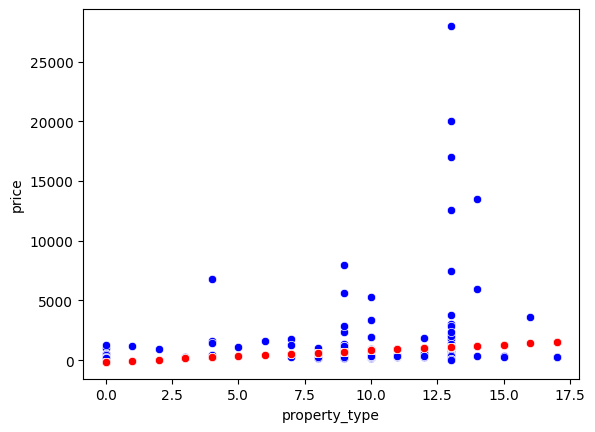

In [99]:
sns.scatterplot(x='property_type', y='price', color="blue", data=mexico_shared_room6)
sns.scatterplot(x='property_type', y='Predicciones', color="red", data=mexico_shared_room6)

In [100]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.019846819354502387

In [101]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.14087873989535252

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_shared_room6.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

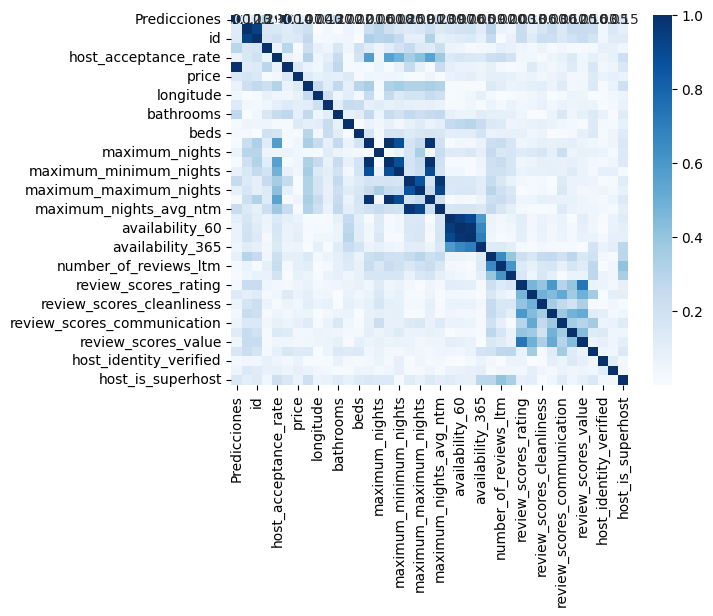

In [104]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map